# Standard Normal Distribution

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Learning Objectives

After studying this notebook, attending class, completing the home activities, and asking questions, you should be able to:
* Understand standard normal distribution and why it is useful.

In [11]:
# load libraries
import numpy as np
import math
import matplotlib.pyplot as plt

## CLT Illustrative Example: Membrane Defects

We will analyze this example taken from the Central Limit Theorem notebook, but using a different method.

Let $X$ denote the number of defects in 1 cm$^2$ patch of membrane. The probability density function of $X$ is given in the following dictionary:

In [2]:
pmf = {0:0.60, 1:0.22, 2:0.13, 3:0.04, 4:0.01}

total = 0
for i in pmf.keys():
    print("Probability of {} defects is {}".format(i,pmf[i]))
    total += pmf[i]
print("\nSanity check. Probabilities sum to",total)

Probability of 0 defects is 0.6
Probability of 1 defects is 0.22
Probability of 2 defects is 0.13
Probability of 3 defects is 0.04
Probability of 4 defects is 0.01

Sanity check. Probabilities sum to 1.0


For simplicity, we will assume $P(X \geq 5) = 0$.

We sample one 1 cm$^2$ patch of membranes from this population.

*What is the probability the average number of defects per patch will be 0.5 or smaller for this sample?*

### Expected Value of Defects

We can compute the expected number of defects using a formula from last week.

In [3]:
# expected number of defects
ev = 0

# loop over outcomes
for i in pmf.keys():
    ev += pmf[i]*i
print(ev)

0.64


### Variance of Defects

In [4]:
# compute expected value of x^2
evx2 = 0
for i in pmf.keys():
    evx2 += pmf[i]*i*i

# compute variance
var = evx2 - ev**2
print(var)

0.8504


## Standardized Normal Distribution

How could we answer the above question is we did not have access to Python? In other words, how did people do statistical analysis with simple calculators?

The core problem is that the integral for the cumulative distribution function (CDF) for the Gaussian (normal) distribution does not have an analytic solution.

$$
F(a) = \int_{-\infty}^{a} f(x ~|~ \mu, \sigma^2) dx
$$

$$
F(a) = \int_{-\infty}^{a} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2 \sigma^2}} dx
$$

This integral is calculated numerically. Virtually all statistics textbooks contain tables of computed values for the standard normal distribution, i.e., $\mathcal{N}(0,1)$.

Here is an example: https://statisticsbyjim.com/hypothesis-testing/z-table/

You can convert any normal distribution to use these tables by **standardizing**:

$$
z = \frac{x - \mu}{\sigma}
$$

Here $z$ is sometimes called a $z$-score.

In [5]:
z = (0.5 - ev)/(math.sqrt(var))
print(z)

-0.1518156033561421


We then look up the probability $P(Z < -0.15) = 0.44$, which matches our result above. We will use Python in this class, but you should know these tables exist.

**Exam Practice**: Show that if $X \sim \mathcal{N}(\mu,\sigma^2)$ and $Z = \frac{X - \mu}{\sigma}$ then $Z \sim \mathcal{N}(0,1)$. Hint: Treat $\mu$ and $\sigma$ as constants.

Below is a graphical representation of the problem above.

![normal-distribution-plot](../../media/zscore-plot.png)

In [6]:
lifetime = [3.2, 6.8, 4.2, 9.2, 11.2, 3.7, 2.9, 12.6, 6.4, 7.5, 8.6,
            4.5, 3.0, 9.6, 1.5, 4.5, 6.3, 7.2, 8.5, 4.2, 6.3, 3.2, 5.0, 4.9, 6.6]

With these data, you can use statistics to ask two fundamental questions:
1. What is the population mean lifetime? (We want an uncertainty range.)
2. Does this sample of 25 catalysts have the manufacturer's promised specifications?

Lifetime Average: 6.064 hours
Lifetime Standard Deviation: 2.7185113573424697 hours


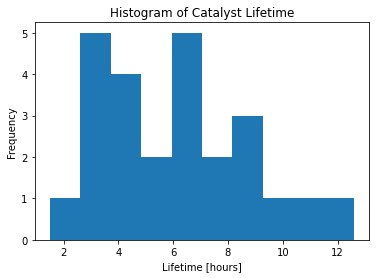

In [12]:
# Make a histogram
plt.hist(lifetime)
plt.title("Histogram of Catalyst Lifetime")
plt.xlabel("Lifetime [hours]")
plt.ylabel("Frequency")

# Compute the mean and standard deviation
xbar = np.mean(lifetime)
s = np.std(lifetime)

print("Lifetime Average: {} hours".format(xbar))
print("Lifetime Standard Deviation: {} hours".format(s))